<a href="https://colab.research.google.com/github/Ahalya24/fastai/blob/master/Part1_lesson2_tops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
classes = ['tanktop' , 'pullover']

In [0]:
path = Path('data/tops')
for c in classes : 
  folder = c
  file = c+'.txt'
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(file, dest, max_pics=600) 
  verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [154]:
data.classes


['pullover', 'tanktop']

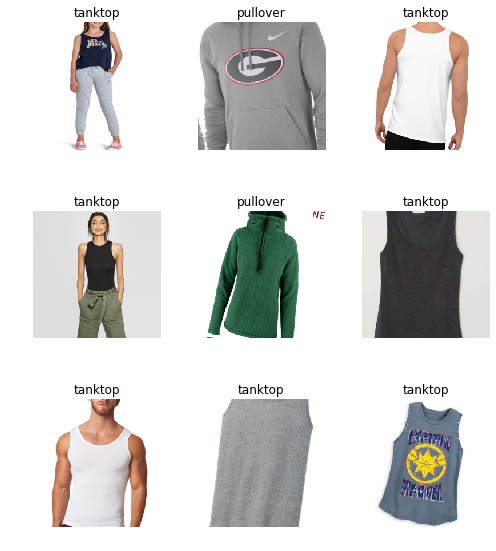

In [155]:
data.show_batch(rows=3, figsize=(7,8))


In [156]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['pullover', 'tanktop'], 2, 171, 18)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [159]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.109323,0.022199,0.000000,00:03
1,0.093391,0.013460,0.000000,00:03


In [160]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


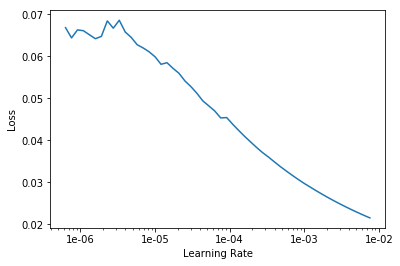

In [123]:
learn.recorder.plot()

In [124]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.085926,0.019423,0.000000,00:03
1,0.076321,0.015493,0.000000,00:04


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


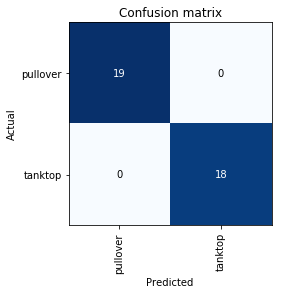

In [128]:
interp.plot_confusion_matrix()


In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [0]:
learn.export()


In [0]:
defaults.device = torch.device('cpu')


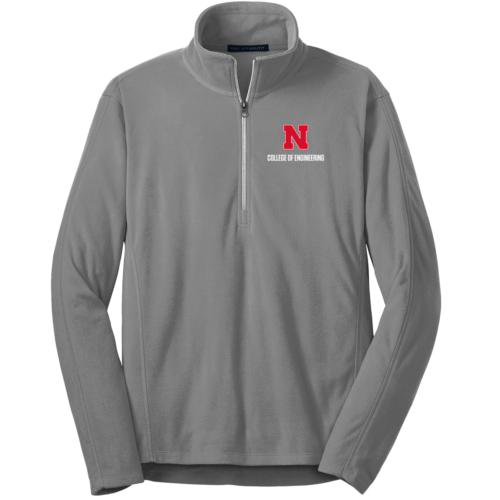

In [151]:
img = open_image(path/'pullover'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [166]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category pullover